In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


from alignsim.simulate import (
    generate_uniform_confusion_matrix, 
    generate_annotations, 
    generate_fixed_accuracy_annotations
)
from alignsim.calculate import (
    calculate_3d_agreement,
    calculate_empirical_accuracy,
    calculate_geirhos_error_matrix,
    calculate_geirhos_metrics
)


from alignsim.visualise import (
    plot_agreement_heatmap
)

## Range of Overlap for two annotators

Below are a series of plots that show the range of overlap for two annotators with specified in terms of error agreement. This tells us how different the values in Geirhos' error consistency matrix can be once the accuracy of the two annotators have been set.



Text(0.5, 1.0, 'Maximal Overlap ($a_1 = 0.600$, $a_2 = 0.800$, EC=0.545)')

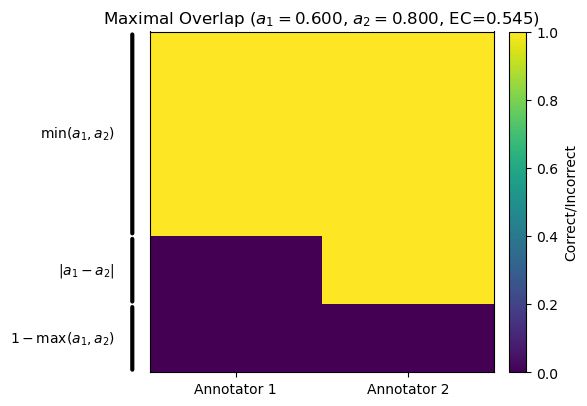

In [3]:
# --- Example Usage ---
N = 1000
# Synthetic labels (random classes 0-4)
acc1 = 0.6
n_correct1 = int(acc1*N)
acc2 = 0.8 
n_correct2 = int(acc2*N)
a1 = np.zeros(N, dtype=int)
a1[:n_correct1] = 1
a2 = np.zeros(N, dtype=int)
a2[:n_correct2] = 1

n_both_correct = min(n_correct1, n_correct2)
n_disagree = np.abs(n_correct1 - n_correct2)

n_both_incorrect = N - n_both_correct- n_disagree
sizes = [n_both_correct, n_disagree, n_both_incorrect]
labels = ["$\min(a_1,a_2)$", "$|a_1-a_2|$", "$1 - \max(a_1, a_2)$"]

plot_agreement_heatmap(a1, a2, sizes, labels)


if acc2 >= acc1:
    n_incorrect_correct = 0 
    n_correct_incorrect = n_disagree
else:
    n_incorrect_correct = n_disagree
    n_correct_incorrect = 0
geirhos_mtx = np.array([
    [n_both_incorrect, n_incorrect_correct],
    [n_correct_incorrect, n_both_correct]])
ec = calculate_geirhos_metrics(geirhos_mtx)['kappa']
plt.title(f"Maximal Overlap ($a_1 = {acc1:.3f}$, $a_2 = {acc2:.3f}$, EC={ec:.3f})")

Text(0.5, 1.0, 'Independent Overlap ($a_1 = 0.600$, $a_2 = 0.800$, EC=0.002)')

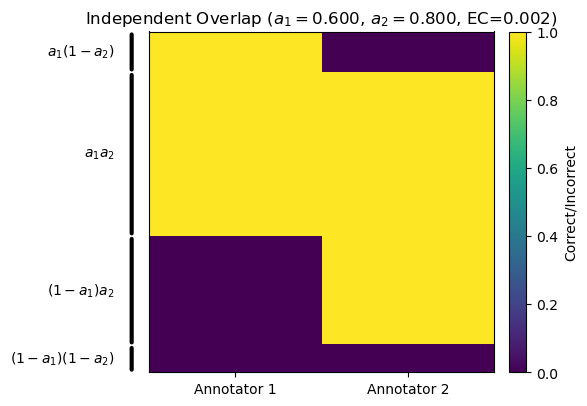

In [4]:
# --- Example Usage ---
N = 1000
# Synthetic labels (random classes 0-4)
acc1 = 0.6
n_correct1 = int(acc1*N)
acc2 = 0.8 
n_correct2 = int(acc2*N)
n_correct_incorrect = int(acc1*(1-acc2)*N)

n_incorrect_correct = int((1-acc1)*acc2*N)


a1 = np.zeros(N, dtype=int)
a1[:n_correct1] = 1
a2 = np.zeros(N, dtype=int)
a2[n_correct_incorrect:n_correct_incorrect+n_correct2] = 1

n_both_correct = n_correct1 - n_correct_incorrect
n_both_incorrect = N - n_correct1 - n_incorrect_correct

sizes = [n_correct_incorrect, n_both_correct, n_incorrect_correct, n_both_incorrect]
labels = ["$a_1 (1-a_2)$", "$a_1 a_2$", "$(1-a_1)a_2$", "$(1-a_1)(1-a_2)$"]

plot_agreement_heatmap(a1, a2, sizes, labels)


geirhos_mtx = np.array([
    [n_both_incorrect, n_incorrect_correct],
    [n_correct_incorrect, n_both_correct]])
ec = calculate_geirhos_metrics(geirhos_mtx)['kappa']
plt.title(f"Independent Overlap ($a_1 = {acc1:.3f}$, $a_2 = {acc2:.3f}$, EC={ec:.3f})")

Text(0.5, 1.0, 'Minimal overlap high accuracy ($a_1 = 0.600$, $a_2 = 0.800$, EC=-0.362)')

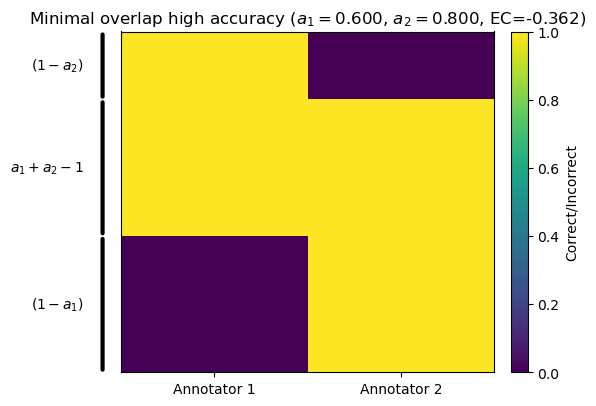

In [5]:
# --- Example Usage ---
N = 1000
# Synthetic labels (random classes 0-4)
acc1 = 0.6
n_correct1 = int(acc1*N)
acc2 = 0.8 
n_correct2 = int(acc2*N)

n_both_incorrect = 0
n_correct_incorrect = int((1-acc2)*N)
n_incorrect_correct = int((1-acc1)*N)
n_both_correct = N - n_correct_incorrect - n_incorrect_correct


a1 = np.zeros(N, dtype=int)
a1[:n_correct1] = 1
a2 = np.zeros(N, dtype=int)
a2[n_correct_incorrect:n_correct_incorrect+n_correct2] = 1


sizes = [n_correct_incorrect, n_both_correct, n_incorrect_correct]
labels = ["$(1-a_2)$", "$a_1 + a_2 - 1$", "$(1-a_1)$"]

plot_agreement_heatmap(a1, a2, sizes, labels)


geirhos_mtx = np.array([
    [n_both_incorrect, n_incorrect_correct],
    [n_correct_incorrect, n_both_correct]])
ec = calculate_geirhos_metrics(geirhos_mtx)['kappa']
plt.title(f"Minimal overlap high accuracy ($a_1 = {acc1:.3f}$, $a_2 = {acc2:.3f}$, EC={ec:.3f})")

Text(0.5, 1.0, 'Minimal overlap low accuracy ($a_1 = 0.400$, $a_2 = 0.200$, EC=-0.364)')

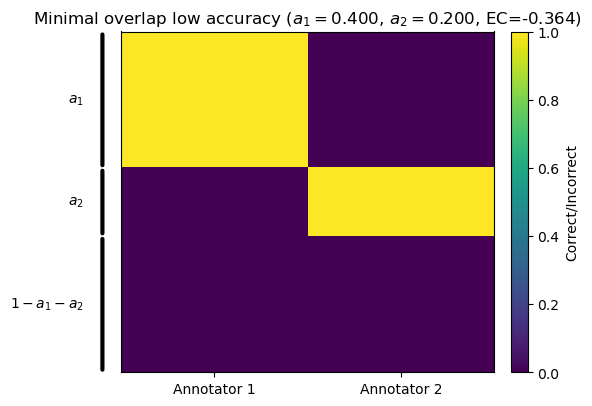

In [6]:
# --- Example Usage ---
N = 1000
# Synthetic labels (random classes 0-4)
acc1 = 0.4
n_correct1 = int(acc1*N)
acc2 = 0.2 
n_correct2 = int(acc2*N)

n_both_correct = 0
n_correct_incorrect = int(acc1*N)
n_incorrect_correct = int(acc2*N)
n_both_incorrect = N - n_correct_incorrect - n_incorrect_correct


a1 = np.zeros(N, dtype=int)
a1[:n_correct1] = 1
a2 = np.zeros(N, dtype=int)
a2[n_correct_incorrect:n_correct_incorrect+n_correct2] = 1


sizes = [n_correct_incorrect, n_incorrect_correct, n_both_incorrect]
labels = ["$a_1$", "$a_2$", "$1 - a_1 - a_2$"]

plot_agreement_heatmap(a1, a2, sizes, labels)


geirhos_mtx = np.array([
    [n_both_incorrect, n_incorrect_correct],
    [n_correct_incorrect, n_both_correct]])
ec = calculate_geirhos_metrics(geirhos_mtx)['kappa']
plt.title(f"Minimal overlap low accuracy ($a_1 = {acc1:.3f}$, $a_2 = {acc2:.3f}$, EC={ec:.3f})")